# Boston Marathon

The [Boston Marathon](http://www.baa.org/) is an annual race held on the third Monday of April. The most recent race happened just this past week! In this lab, you will look at the results from the 2010 and 2015 races, which can be found in the `/data301/data/marathon/` directory.

In [2]:
!ls /data301/data/marathon

2001.csv  2004.csv  2007.csv  2010.csv	2013.csv  2016.csv
2002.csv  2005.csv  2008.csv  2011.csv	2014.csv  2017.csv
2003.csv  2006.csv  2009.csv  2012.csv	2015.csv


## Question 1

Read in the data for 2010. The marathon times (in minutes) are stored in the column "official". The world record marathon time is 2:02:57, or about 123 minutes. Yet some of the times in this table are much less than 123 minutes.

Find all competitors with marathon times under 123 minutes. How many are there? Look up the names of some of these competitors on Google. Can you figure out why their marathon times are so unusually fast?

In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
marathon_2010 = pd.read_csv("/data301/data/marathon/2010.csv")
marathon_2010[marathon_2010.official < 123]

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,1 / 22,"Van Dyk, Ernst",Paarl,M,37,86.88,W1,1 / 29,NaN,1 / 24,NaN,RSA
3,2 / 22,"Schabort, Krige",Cedartown,M,46,86.93,W2,2 / 29,GA,2 / 24,NaN,USA
4,4 / 22,"Masazumi, Soejima",Fukuoka,M,39,88.10,W3,4 / 29,NaN,4 / 24,NaN,JPN
7,5 / 22,"Puigbo, Roger",Sant Julia De Vilatorta,M,32,88.42,W4,5 / 29,NaN,5 / 24,NaN,ESP
10,6 / 22,"Botello Jimenez, Rafael",Manlleu (BCN),M,31,91.20,W6,6 / 29,NaN,6 / 24,NaN,ESP
13,7 / 22,"Madera, Jorge",Granollers,M,30,93.13,W7,7 / 29,NaN,7 / 24,NaN,ESP
16,3 / 22,"Hokinoue, Kota",Iizuka,M,36,87.08,W8,3 / 29,NaN,3 / 24,NaN,JPN
18,11 / 22,"Pike, Aaron L.",Champaign,M,23,98.28,W9,11 / 29,IL,11 / 24,NaN,USA
22,8 / 22,"George, Joshua",Mclean,M,26,95.73,W10,8 / 29,VA,8 / 24,NaN,USA
24,9 / 22,"Bleakney, Adam",Champaign,M,34,98.02,W11,9 / 29,IL,9 / 24,NaN,USA


From the competitors I googled, all of them are competing in wheelchairs. This might suggest the length of the marathon is different for competitors with disabilities, or the speed at which they roll the wheelchairs is significantly higher than running, which is why the officials times are lower than the record for a running marathon. 

## Question 2

Let's restrict our analysis to runners only. Of course, this means that we have to remove not only the competitors that we identified in Question 1, but also other competitors like them.

Look closely at the 2010 data set. Do you see anything in the data set that will allow you to identify the non-runners? Write code to remove the non-runners from the data set.

The non-runners have a bib number containing a W 

In [47]:
runners = marathon_2010[~marathon_2010.bib.str.contains("W") & ~marathon_2010.bib.str.contains("F")]
runners.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
1,3 / 4660,"Merga, Deriba",Addis Ababa,M,29,128.65,1,3 / 22672,NaN,3 / 13120,NaN,ETH
5,4 / 4660,"Hall, Ryan",Mammoth Lakes,M,27,128.68,3,4 / 22672,CA,4 / 13120,NaN,USA
9,21 / 4660,"Yegon, Gilbert",Eldoret,M,21,141.20,5,22 / 22672,NaN,22 / 13120,NaN,KEN
11,1 / 4660,"Cheruiyot, Robert Kiprono",Bomet,M,21,125.87,6,1 / 22672,NaN,1 / 13120,NaN,KEN
15,15 / 4660,"Dechase, Chala",Addis Ababa,M,25,134.95,8,15 / 22672,NaN,15 / 13120,NaN,ETH


## Question 3

In August 2012, Vice-Presidential candidate Paul Ryan claimed that he had run a marathon in "under three [hours], high twos. I had a two hour and fifty-something."

- Make a histogram showing the distribution of **men's** marathon times in the 2010 Boston Marathon.
- If Ryan had indeed run a marathon in under 3 hours, what percentile would that have put him at among all **male** runners in the 2010 Boston Marathon?
- It turns out that Ryan actually ran the marathon in 4:01:25. What percentile would that have put him at among all **male** runners in the 2010 Boston Marathon?

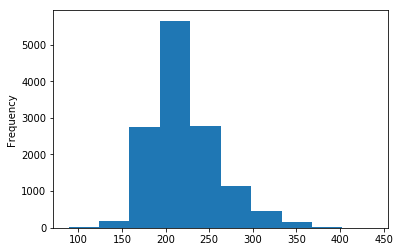

In [4]:
runners[runners.gender == "M"].official.plot.hist()

In [7]:
runners[runners.gender == "M"].quantile(.10)

age          28.000
official    180.225
net             NaN
Name: 0.1, dtype: float64

In [11]:
runners[runners.gender == "M"].quantile(.76)

age          51.000
official    241.038
net             NaN
Name: 0.76, dtype: float64

The majority of male runners completed the marathon in the 200 minute mark. Paul Ryan's claim of under 3 hours would put him at about the 10th percentile. However, his actual time would put him at about the 76th percentile. 

## Question 4

How does marathon time vary with age? Make a graphic that shows the relationship. Be sure to indicate gender on your graphic.

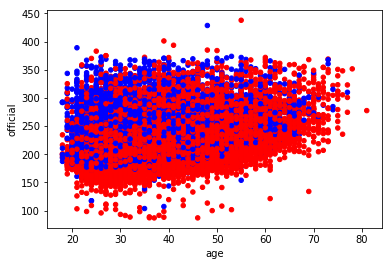

In [12]:
color = {"M":"red", "F":"blue"}
gender = marathon_2010["gender"].map(color)
marathon_2010.plot.scatter(x = "age", y = "official", c = gender)

In [13]:
marathon_2010.age.corr(marathon_2010.official)

0.20659040112892293

The marathon time slightly increases as the age goes up, as described by the correlation and general trend of the scatter plot. More men ran faster times at the same age as women did. 

## Question 5

Read in the 2015 results. Information about this data can be found [here](https://www.kaggle.com/rojour/boston-results).

The 2015 data only contains results for runners, so you do not have to do the same cleaning that you did for the 2010 data. However, the marathon times are stored (in the column "Official Time") in hours:minutes:seconds (`"%H:%M:%S"`) format, instead of in minutes. Convert this variable to a quantitative variable representing the time in minutes.

In [24]:
marathon_2015 = pd.read_csv("/data301/data/marathon/2015.csv")
splits = marathon_2015["Official Time"].str.split(":")
total_times = splits.str.get(0).astype(int) * 60 + splits.str.get(1).astype(int) + splits.str.get(2).astype(float) / 60
marathon_2015["Official Time"] = total_times

## Question 6

Restrict to countries that had at least 50 runners. Make a visualization showing the conditional distribution of gender, given country. Interpret what you see.

In [60]:
by_country = marathon_2015.groupby("Country")["Official Time"].count()
countries = by_country[by_country > 50]
counts = marathon_2015.groupby("M/F")
counts

M/F
F    KENETHETHUSAKENKENETHETHUSAKENBLRCROUSAJPNUSAU...
M    ETHETHKENKENKENKENUSAUSAETHUKRUSAUSARSAUSAITAU...
Name: Country, dtype: object

**INTERPRET YOUR GRAPH HERE.**

## Question 7

The female winner of the 2015 Boston Marathon was Caroline Rotich. Which _male_ runner was most similar to her? In your analysis, be sure to use not just the overall time, but also the 5K, 10K, ..., 40K times, since you will find that men and women pace themselves differently.

(_Hint_: Not all of the variables are sensible to include in your analysis. Decide which ones to include, and explain your choice.)

**EXPLAIN WHICH VARIABLES YOU INCLUDED OR EXCLUDED FROM YOUR ANALYSIS AND WHY.**

In [36]:
marathon_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,129.283333,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,129.800000,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,130.366667,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,130.783333,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,130.816667,5,5,5


In [61]:
x_vars = ["Official Time", "5K", "10K", "25K", "30K", "35K", "40K", "Pace"]
caroline = marathon_2015[marathon_2015.Name == "Rotich, Caroline"]

males = marathon_2015[marathon_2015["M/F"] == "M"]

males

**SUMMARIZE WHAT YOU DISCOVERED HERE.**

## Preparing for Submission

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.
4. Go to `File > Save Notebook`.

Then, read the `Submission Instructions.ipynb` for instructions on how to submit the lab.